## Visualisation and Exploration of Data

In [0]:
%matplotlib inline
import re
import enum
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
import seaborn as sns
import json
from pprint import pprint
import csv
from ast import literal_eval


In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
# df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/cleaned_trinary.csv')
df = pd.read_csv('/content/cleaned_trinary.csv')
# df.tags = df.tags.apply(literal_eval)
# df['object_labels'] = df['object_labels'].str.split(',')

df.head()

,id,tags,object_labels
0,f450c94bcc1a3cdd0bc09b09ab2fe879b7c682705b1632...,HighCrime,"Symbol,Flag,American Flag,Human,Person,Poster,..."
1,f899d3a1bb9f0d633ae639f7f8d9dd973f249cf750903e...,LowCrime,"Person,Human,Apparel,Clothing,Sport,Sports,Hand"
2,cd7483ed88abe76e3954033981877540707f7d68a2b5f6...,HighCrime,"Text,Newspaper,Menu"
3,e2d089ddbdc90bc583ca570dd27db0464372a51ae86d31...,LowCrime,"Person,Human,Footwear,Shoe,Apparel,Clothing,Wh..."
4,de1ef9c15b9d2313f19f58ac503e088728b6f0bf3b33d2...,HighCrime,"Person,Human,Food,Meal,Restaurant,Shop"


In [0]:
# dum = pd.get_dummies(pd.DataFrame(df['tags'].tolist()).stack()).sum(level=0)
# df = pd.concat([df, dum], axis=1) 

from sklearn.preprocessing import MultiLabelBinarizer

mlb = MultiLabelBinarizer()
df = df.join(pd.DataFrame(mlb.fit_transform(df.pop('tags')),
                          columns=mlb.classes_,
                          index=df.index))


df.head()

,id,object_labels,,',",",A,C,D,G,H,N,O,P,S,T,V,[,],a,c,d,e,f,g,h,i,l,m,n,o,p,r,s,t,u,x,y
0,ef560ef5493aa2e2a9d5dbfc363da0fc820be04c2d7166...,"Medical Imaging X-Ray Film,Ct Scan,X-Ray",0,1,0,0,1,0,0,0,1,0,0,0,0,0,1,1,0,0,0,1,0,0,0,1,0,1,0,1,0,1,0,0,0,0,0
1,f42884d282acb522a396c2402764196e29e1e903235b64...,"Person,Human,Face,Hair,Clothing,Apparel,Female...",0,1,0,0,1,0,0,0,1,0,0,0,0,0,1,1,0,0,0,1,0,0,0,1,0,1,0,1,0,1,0,0,0,0,0
2,f450c94bcc1a3cdd0bc09b09ab2fe879b7c682705b1632...,"Symbol,Flag,American Flag,Human,Person,Poster,...",0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,1,1,0,0,1,0,1,0,0,0,0,0,1,0,0,1,1,0,0,0
3,e13857bad42bc7136d46d31eee7b203deae19c7dc51f09...,"Bow,Human,Person,Cello,Musical Instrument,Art,...",0,1,0,0,1,0,0,0,1,0,0,0,0,0,1,1,0,0,0,1,0,0,0,1,0,1,0,1,0,1,0,0,0,0,0
4,ff9acd6031d9f9e65eef06589d9b48904b035bc7241dd0...,"Head,Face,Person,Human,Jaw,Skin,Beard,Hair,Pho...",0,1,0,0,1,0,0,0,1,0,0,0,0,0,1,1,0,0,0,1,0,0,0,1,0,1,0,1,0,1,0,0,0,0,0


In [0]:
# cols = ['Assault', 'Drugs','Gun', 'Homicide', 'Hostage', 'NoCrime', 'PropertyDamage', 'SexOffence', 'Theft', 'Vehicular']
# df[cols] = df[cols].applymap(np.int64)
df = df.dropna(subset = ['Assault', 'Drugs','Gun', 'Homicide', 'Hostage', 'NoCrime', 'PropertyDamage', 'SexOffence', 'Theft', 'Vehicular'])
df = df.dropna(subset = ['object_labels'])
# df.drop(df.index[[2746, 3785]])
df1 = df[df.isna().any(axis=1)]
# df.iloc[[3785]]
print (df1["id"])
# df.columns
# df.head()
# df.info()

KeyError: ignored

In [0]:
one_hot = pd.get_dummies(df['tags'])
df = df.drop('tags',axis = 1)
df = df.join(one_hot)

df.head()

,id,object_labels,HighCrime,LowCrime,NoCrime
0,f450c94bcc1a3cdd0bc09b09ab2fe879b7c682705b1632...,"Symbol,Flag,American Flag,Human,Person,Poster,...",1,0,0
1,f899d3a1bb9f0d633ae639f7f8d9dd973f249cf750903e...,"Person,Human,Apparel,Clothing,Sport,Sports,Hand",0,1,0
2,cd7483ed88abe76e3954033981877540707f7d68a2b5f6...,"Text,Newspaper,Menu",1,0,0
3,e2d089ddbdc90bc583ca570dd27db0464372a51ae86d31...,"Person,Human,Footwear,Shoe,Apparel,Clothing,Wh...",0,1,0
4,de1ef9c15b9d2313f19f58ac503e088728b6f0bf3b33d2...,"Person,Human,Food,Meal,Restaurant,Shop",1,0,0


## The frequecies of different crime types in our dataset

In [0]:
df_tags = df.drop(['id','object_labels'], axis=1)
counts = []
categories = list(df_tags.columns.values)
for i in categories:
    counts.append((i, df_tags[i].sum()))
df_stats = pd.DataFrame(counts, columns=['category', 'f'])
df_stats

,category,f
0,HighCrime,607
1,LowCrime,332
2,NoCrime,1881


In [0]:
df_stats.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 2 columns):
category    3 non-null object
f           3 non-null int64
dtypes: int64(1), object(1)
memory usage: 128.0+ bytes


Text(0.5, 0, 'category')

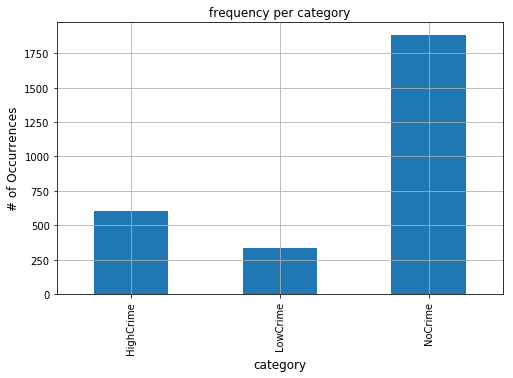

In [0]:
df_stats.plot(x='category', y='f', kind='bar', legend=False, grid=True, figsize=(8, 5))
plt.title("frequency per category")
plt.ylabel('# of Occurrences', fontsize=12)
plt.xlabel('category', fontsize=12)

## Labels/Categories per image

Text(0.5, 0, '# of categories')

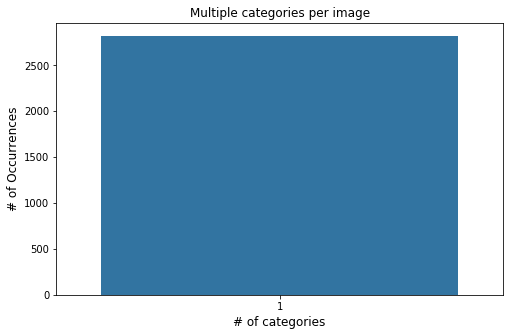

In [0]:
rowsums = df.iloc[:,2:].sum(axis=1)
x=rowsums.value_counts()#plot
plt.figure(figsize=(8,5))
ax = sns.barplot(x.index, x.values)
plt.title("Multiple categories per image")
plt.ylabel('# of Occurrences', fontsize=12)
plt.xlabel('# of categories', fontsize=12)


## Number of object labels per image

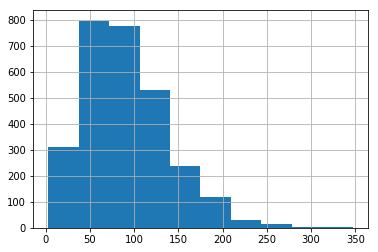

In [0]:
lens = df.object_labels.str.len()
lens.hist()


In [0]:
# df = df.drop('tags', 1)
categories = ['NoCrime', 'HighCrime','LowCrime']
train, test = train_test_split(df, random_state=42, test_size=0.33, shuffle=True)
X_train = train.object_labels
X_test = test.object_labels
print(X_train.shape)
print(X_test.shape)

(1889,)
(931,)


In [0]:
train.describe()

,HighCrime,LowCrime,NoCrime
count,1889.000000,1889.000000,1889.000000
mean,0.218105,0.111170,0.670725
std,0.413068,0.314426,0.470074
min,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000
75%,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000
